In [76]:
import random
import mph
import numpy as np
import matplotlib.pyplot as plt
import os    
import time
from tqdm.notebook import tqdm
import pickle
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf

path = 'D:/Josh/Fall 2021/ML-LWA/partialslotsmodel_transuse_50only.mph'

scattering = [1,2,5,6,7,51,53,56,57]

In [77]:
def start_client(path):
    global model
    global pymodel
    global client
    client = mph.start(version = '5.3a')
    pymodel = client.load(path)
    model = pymodel.java
    
def save_model(path):
    model.save(path)
    
def generate_image(random_pattern):
    return np.flip(np.array(random_pattern) / 2)
    
def simulate_random():
    global start_count
    
    vals = np.random.randint(3, size = 36)

    while (sum(vals) / len(vals) < 0.9) or (sum(vals) / len(vals) > 1.1):
        vals = np.random.randint(3, size = 36)
        
    vals = list(vals)

    bucket_list = [0, 1, 2]
    
    buckets = []
    
    for out_index,bucket in enumerate(bucket_list):
        out_list = [index + 18 for index,slot in enumerate(vals) if slot == bucket]
        buckets.append([x-1 if x == 18 else x for x in out_list])
        
#     return buckets

    boundlist = ['1', '3', '5']

    for i in np.arange(0,3):
        model.physics("emw").feature("trans" + boundlist[i]).selection().set(buckets[i]);

    model.geom("geom1").runAll();
    model.mesh().run();
    model.sol("sol1").runAll();
    
    model.result("pg4").set("data", 'dset1')
    model.result("pg4").feature("ff1").run()
    model.result().export("plot1").set("filename", save_str + '.csv')
    model.result().export("plot1").set("plotgroup", "pg4")
    model.result().export("plot1").set("plot", "ff1")
    
    model.result().export("plot1").run()
    
    return vals

def simulate(vals):

    bucket_list = [0, 1, 2]
    
    buckets = []
    
    for out_index,bucket in enumerate(bucket_list):
        out_list = [index + 18 for index,slot in enumerate(vals) if slot == bucket]
        buckets.append([x-1 if x == 18 else x for x in out_list])
        
    boundlist = ['1', '3', '5']

    for i in np.arange(0,3):
        model.physics("emw").feature("trans" + boundlist[i]).selection().set(buckets[i]);

    model.geom("geom1").runAll();
    model.mesh().run();
    model.sol("sol1").runAll();
    
    model.result("pg4").set("data", 'dset1')
    model.result("pg4").feature("ff1").run()
    model.result().export("plot1").set("filename", save_str + '.csv')
    model.result().export("plot1").set("plotgroup", "pg4")
    model.result().export("plot1").set("plot", "ff1")
    
    model.result().export("plot1").run()
    
    return vals


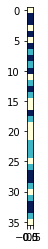

In [31]:
plt.imshow(tf.expand_dims(simulate_random(),1),cmap='YlGnBu')

In [55]:
for instance in tqdm(np.arange(40)):
    img_list = []

    save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/comsol_results/3grey/' + str(int(time.time()))

    start_client(path)
    start_time = time.time()
    for i in tqdm(np.arange(500)):
        goi = simulate_random()
        img = generate_image(goi)
        img_list.append(img)

    print(time.time() - start_time, 'seconds')

    with open(save_str + '.pkl', 'wb') as file:
        pickle.dump(img_list, file)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

27787.540410518646 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

27736.403918981552 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

27699.789259672165 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

28165.965217113495 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

28473.26188516617 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

28505.245005369186 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

28512.8801176548 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

28700.877153158188 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

28914.820312976837 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

29141.570526838303 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

29187.30306482315 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

29322.318215847015 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

30469.26550221443 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

28927.032869577408 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

29871.22626233101 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

33760.93311738968 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

31384.33587694168 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

31172.119839429855 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

36657.74655723572 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

35324.79693317413 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

38207.92109799385 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

35999.613053798676 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

35162.889689683914 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

36280.59883308411 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

36325.55875325203 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

36610.35533452034 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

36681.50375032425 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

36836.403485774994 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

37010.27810692787 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

40829.93952894211 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

37637.16093850136 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

37976.360703229904 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

37958.893131017685 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

38153.46938753128 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

38027.1353392601 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

37858.334270238876 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

37860.04110598564 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

37725.95671629906 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

41638.95635962486 seconds


  0%|          | 0/500 [00:00<?, ?it/s]

java.lang.RuntimeException: java.lang.RuntimeException: java.io.IOException: There is not enough space on the disk

In [51]:
save_model('D:/Josh/Fall 2021/ML-LWA/partialslotsmodel_transuse_50onlyTEST2.mph')

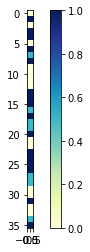

In [52]:
plt.imshow(tf.expand_dims(img_list[0],1),cmap='YlGnBu')
plt.colorbar()

In [ ]:
img_li

In [ ]:
out = simulate_random()
img = generate_image(out)
plt.imshow(tf.expand_dims(img,1))
plt.colorbar()

In [17]:
first = []
second = []
third = []
for i in np.arange(200000):
    one,two,three = simulate_random()
    first.append(len(one))
    second.append(len(two))
    third.append(len(three))


In [18]:
sum(first) / len(first)

11.92867

In [21]:
sum(second) / len(second)

12.13757

In [22]:
sum(third) / len(third)

11.93376

In [ ]:
vals = np.random.uniform(0,1.12,32)
    
while (vals.sum() < 15.5) or (vals.sum() > 16.5):
    print('going')
    vals = np.random.uniform(0,1,32)

In [ ]:
vals.sum()

In [ ]:
plt.imshow(tf.expand_dims(img_list[0],1),cmap='YlGnBu')

<h1>Please don't close out of this, very long simulation in progress! Using the computer is fine just don't close this window, thanks!</h1>

<h4>Light simulations should work fine but if you need to do anything heavy, click Kernel in the toolbar above and just hit shutdown, just shoot me (Josh) an email if you need to do that.</h4>

In [ ]:
for instance in tqdm(np.arange(10)):
    img_list = []

    save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/comsol_results/1dgrey/' + str(int(time.time()))

    start_client(path)
    start_time = time.time()
    for i in tqdm(np.arange(500)):
        goi = simulate_random()
        img = generate_image(goi)
        img_list.append(img)

    print(time.time() - start_time, 'seconds')

    with open(save_str + '.pkl', 'wb') as file:
        pickle.dump(img_list, file)

In [ ]:
model.save('D:/Josh/Fall 2021/ML-LWA/xmlerror.mph')

In [ ]:
len(img_list)

In [ ]:
plt.imshow(tf.expand_dims(img_list[0],1))
plt.colorbar()

In [78]:
with open('1d/peaks_to_slot/3grey/results/test_data627.pkl', 'rb') as pkl_file:
    slots, true, preds, _ = pickle.load(pkl_file)
    
preds = np.where((preds > 0) & (preds <= 0.333), 0, preds)
preds = np.where((preds > 0.333) & (preds <= 0.666), 0.50, preds)
preds = np.where((preds > 0.666), 1.00, preds)

In [ ]:
# img_list = []

save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/1d/peaks_to_slot/3grey/results/test627'

start_client(path)
start_time = time.time()
for i in tqdm(np.arange(500)):
      
    goi = simulate([int(x) for x in np.flip(preds[i]) * 2])


print(time.time() - start_time, 'seconds')

# with open(save_str + '.pkl', 'wb') as file:
#     pickle.dump(img_list, file)

  0%|          | 0/500 [00:00<?, ?it/s]

In [8]:
with open('1d/peaks_to_slot/grey/results/test_data_comp.pkl', 'rb') as pkl_file:
    slots, true, preds,_ = pickle.load(pkl_file)
      
preds = np.where((preds > 0) & (preds <= 0.125), 0, preds)
preds = np.where((preds > 0.125) & (preds <= 0.375), 0.25, preds)
preds = np.where((preds > 0.375) & (preds <= 0.625), 0.50, preds)
preds = np.where((preds > 0.625) & (preds <= 0.875), 0.75, preds)
preds = np.where((preds > 0.875), 1.00, preds)

In [9]:
# img_list = []

# save_str = # img_list = []

save_str = 'C:/Users/THzAbacus/Documents/Josh/LeakyWaveML/1d/peaks_to_slot/grey/results/complosstest'

start_client(path)
start_time = time.time()
for i in tqdm(np.arange(500)):
      
    goi = simulate([int(x) for x in np.flip(preds[i]) * 4])


print(time.time() - start_time, 'seconds')

  0%|          | 0/500 [00:00<?, ?it/s]

23648.93062019348 seconds


In [ ]:
save_model('D:/Josh/Fall 2021/ML-LWA/partialslotsmodel_forusee2.mph')

In [ ]:
plt.imshow(tf.expand_dims(true[1],1),cmap='YlGnBu')

In [ ]:
plt.imshow(tf.expand_dims(preds[0],1),cmap='YlGnBu')
plt.colorbar()

In [ ]:
np.flip(preds[0])[35]

In [ ]:
# start_client(path)
simulate(np.flip(preds[0]))
# save_model('D:/Josh/Fall 2021/ML-LWA/partialslotsmodel_test2.mph')

In [ ]:
start_client(path)
simulate(np.flip(preds[0]))
# save_model('D:/Josh/Fall 2021/ML-LWA/partialslotsmodel_test2.mph')

In [ ]:
save_model('D:/Josh/Fall 2021/ML-LWA/partialslotsmodel_test4.mph')

In [ ]:
plt.imshow(tf.expand_dims(preds[0],1),cmap='YlGnBu')
plt.colorbar()